In [336]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [337]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data");

In [338]:
#Eyeballing the data
print("Data Shape: ", data.shape, "\n")
print("Data Univariate Analysis: \n\n", data.describe())

Data Shape:  (195, 24) 

Data Univariate Analysis: 

        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.00

In [339]:
#We shall now proceed for next stage of univariate analysis of data which concerns 
#identifying missing values, replacing missing or NaN values if any with fillers, capping outliers if any.
#Here is the metadata concerning the data set:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [340]:
#Let us check for null values now
print(data[data.isna().any(axis=1)])
print(data[data.isna().any(axis=1)])

Empty DataFrame
Columns: [name, MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, status, RPDE, DFA, spread1, spread2, D2, PPE]
Index: []

[0 rows x 24 columns]
Empty DataFrame
Columns: [name, MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, status, RPDE, DFA, spread1, spread2, D2, PPE]
Index: []

[0 rows x 24 columns]


In [341]:
#Thus, there are no NaN or Null values in the dataset.
#It seems 'name' is categorical as it is an object. Let us verify by 'value counts'
print(data['name'].value_counts())
print("Unique Values: ", data['name'].nunique())

phon_R01_S25_1    1
phon_R01_S25_3    1
phon_R01_S27_6    1
phon_R01_S34_6    1
phon_R01_S04_4    1
phon_R01_S32_2    1
phon_R01_S06_6    1
phon_R01_S02_3    1
phon_R01_S02_6    1
phon_R01_S06_4    1
phon_R01_S05_6    1
phon_R01_S37_3    1
phon_R01_S05_4    1
phon_R01_S19_3    1
phon_R01_S25_2    1
phon_R01_S42_2    1
phon_R01_S20_4    1
phon_R01_S08_2    1
phon_R01_S43_6    1
phon_R01_S13_5    1
phon_R01_S34_4    1
phon_R01_S10_6    1
phon_R01_S08_5    1
phon_R01_S31_3    1
phon_R01_S49_1    1
phon_R01_S50_5    1
phon_R01_S07_4    1
phon_R01_S21_3    1
phon_R01_S20_5    1
phon_R01_S13_1    1
                 ..
phon_R01_S31_6    1
phon_R01_S20_2    1
phon_R01_S06_5    1
phon_R01_S43_5    1
phon_R01_S27_7    1
phon_R01_S22_1    1
phon_R01_S21_6    1
phon_R01_S21_1    1
phon_R01_S13_2    1
phon_R01_S27_1    1
phon_R01_S32_6    1
phon_R01_S25_6    1
phon_R01_S08_3    1
phon_R01_S43_1    1
phon_R01_S07_5    1
phon_R01_S35_3    1
phon_R01_S13_3    1
phon_R01_S25_4    1
phon_R01_S44_3    1


In [342]:
#The above values can be considered as candidates which should be converted to numerical format for data analysis 
#purposes and can be done so using a Label Encoder

In [343]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['name'])
data['name'] = le.transform(data['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null int64
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float

In [344]:
#It seems data is appropriate for numerical operations required for model generation
data.describe()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,97.000000,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,56.435804,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,0.000000,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,48.500000,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,97.000000,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,145.500000,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,194.000000,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [345]:
#Let us now cap outliers in the feature set.
#We shall only consider features which shall qualify for outlier analysis i.e.
#features with continuous values and not features that are categorical, order or count variables as they are ineligible for outlier
#analysis. Features which qualify for outlier analysis are all except name and status (which is our target variable)
capDf = pd.DataFrame()
toCapDf = data.loc[:, (data.columns != 'name') & (data.columns != 'status')]
toCapDf
for col in data.columns:
    if(data[col].dtype == object):
        capDf[col] = data[col]
        continue
    if(col in toCapDf.columns):
        percentiles = toCapDf[col].quantile([0.25,0.75]).values
        Q1 = percentiles[0]
        Q3 = percentiles[1]
        IQR = Q3 - Q1
        minCap = Q1 - (IQR) * 1.5
        maxCap = Q3 + (IQR) * 1.5
        capDf[col] = toCapDf[col][(toCapDf[col] >= minCap) & (toCapDf[col] <= maxCap)]
    else:
        capDf[col] = data[col]
    
capDf.dropna(inplace=True)

In [346]:
#Printing the outliers which were removed (In all, 47 eligible outlier rows were removed)
outlierDf = pd.concat([data, capDf])
outlierDf = outlierDf.reset_index(drop=True)
df_gpby = outlierDf.groupby(list(outlierDf.columns))
idx = [x[0] for x in df_gpby.groups.values() if len(x) == 1]
outlierDf.reindex(idx)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,1,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,4,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,5,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
17,17,168.778,232.181,75.603,0.00718,0.000040,0.00284,0.00387,0.00853,0.03327,...,0.04322,0.02919,20.376,1,0.631099,0.605417,-2.931070,0.434326,3.007463,0.430788
18,18,153.046,175.829,68.623,0.00742,0.000050,0.00364,0.00432,0.01092,0.05517,...,0.07413,0.03160,17.280,1,0.665318,0.719467,-3.949079,0.357870,3.109010,0.377429
42,42,237.226,247.326,225.227,0.00298,0.000010,0.00169,0.00182,0.00507,0.01752,...,0.03104,0.00740,22.736,0,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
43,43,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,...,0.03017,0.00675,23.145,0,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
44,44,243.439,250.912,232.435,0.00210,0.000009,0.00109,0.00137,0.00327,0.01419,...,0.02330,0.00454,25.368,0,0.438296,0.635285,-7.057869,0.091608,2.330716,0.091470
45,45,242.852,255.034,227.911,0.00225,0.000009,0.00117,0.00139,0.00350,0.01494,...,0.02542,0.00476,25.032,0,0.431285,0.638928,-6.995820,0.102083,2.365800,0.102706


In [347]:
#We now have the data capped for outliers and which is suitable for further processing. Here is a brief univariate analysis of the data,
#after pre-processing.
capDf.describe()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,...,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,94.952703,148.583973,172.427358,111.498642,0.004967,0.000037,0.002561,0.002728,0.007683,0.025101,...,0.039882,0.013812,22.891480,0.770270,0.493781,0.723802,-5.858949,0.215788,2.298651,0.190637
std,56.652099,38.322647,46.495258,36.932413,0.002069,0.000019,0.001240,0.001182,0.003717,0.011803,...,0.020087,0.011229,3.535939,0.422087,0.103966,0.051712,0.855630,0.071016,0.326165,0.067335
min,0.000000,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,13.893000,0.000000,0.263654,0.574282,-7.964984,0.056844,1.423287,0.044539
25%,47.750000,116.604000,130.867750,84.400500,0.003405,0.000020,0.001623,0.001837,0.004860,0.015995,...,0.023330,0.005310,20.359000,1.000000,0.412121,0.685824,-6.449115,0.174766,2.050520,0.141802
50%,92.500000,143.860500,163.045500,102.505500,0.004595,0.000030,0.002250,0.002500,0.006740,0.022070,...,0.036605,0.010290,22.633000,1.000000,0.490441,0.727530,-5.835178,0.210369,2.299157,0.185624
75%,140.500000,176.832500,207.250250,130.213250,0.006240,0.000050,0.003495,0.003375,0.010477,0.032130,...,0.051723,0.018627,25.570250,1.000000,0.580545,0.762621,-5.310350,0.258069,2.505832,0.232773
max,194.000000,252.455000,349.259000,221.156000,0.011010,0.000100,0.006470,0.006980,0.019410,0.059250,...,0.100700,0.054700,33.047000,1.000000,0.685151,0.821364,-3.583722,0.397749,3.099301,0.368975


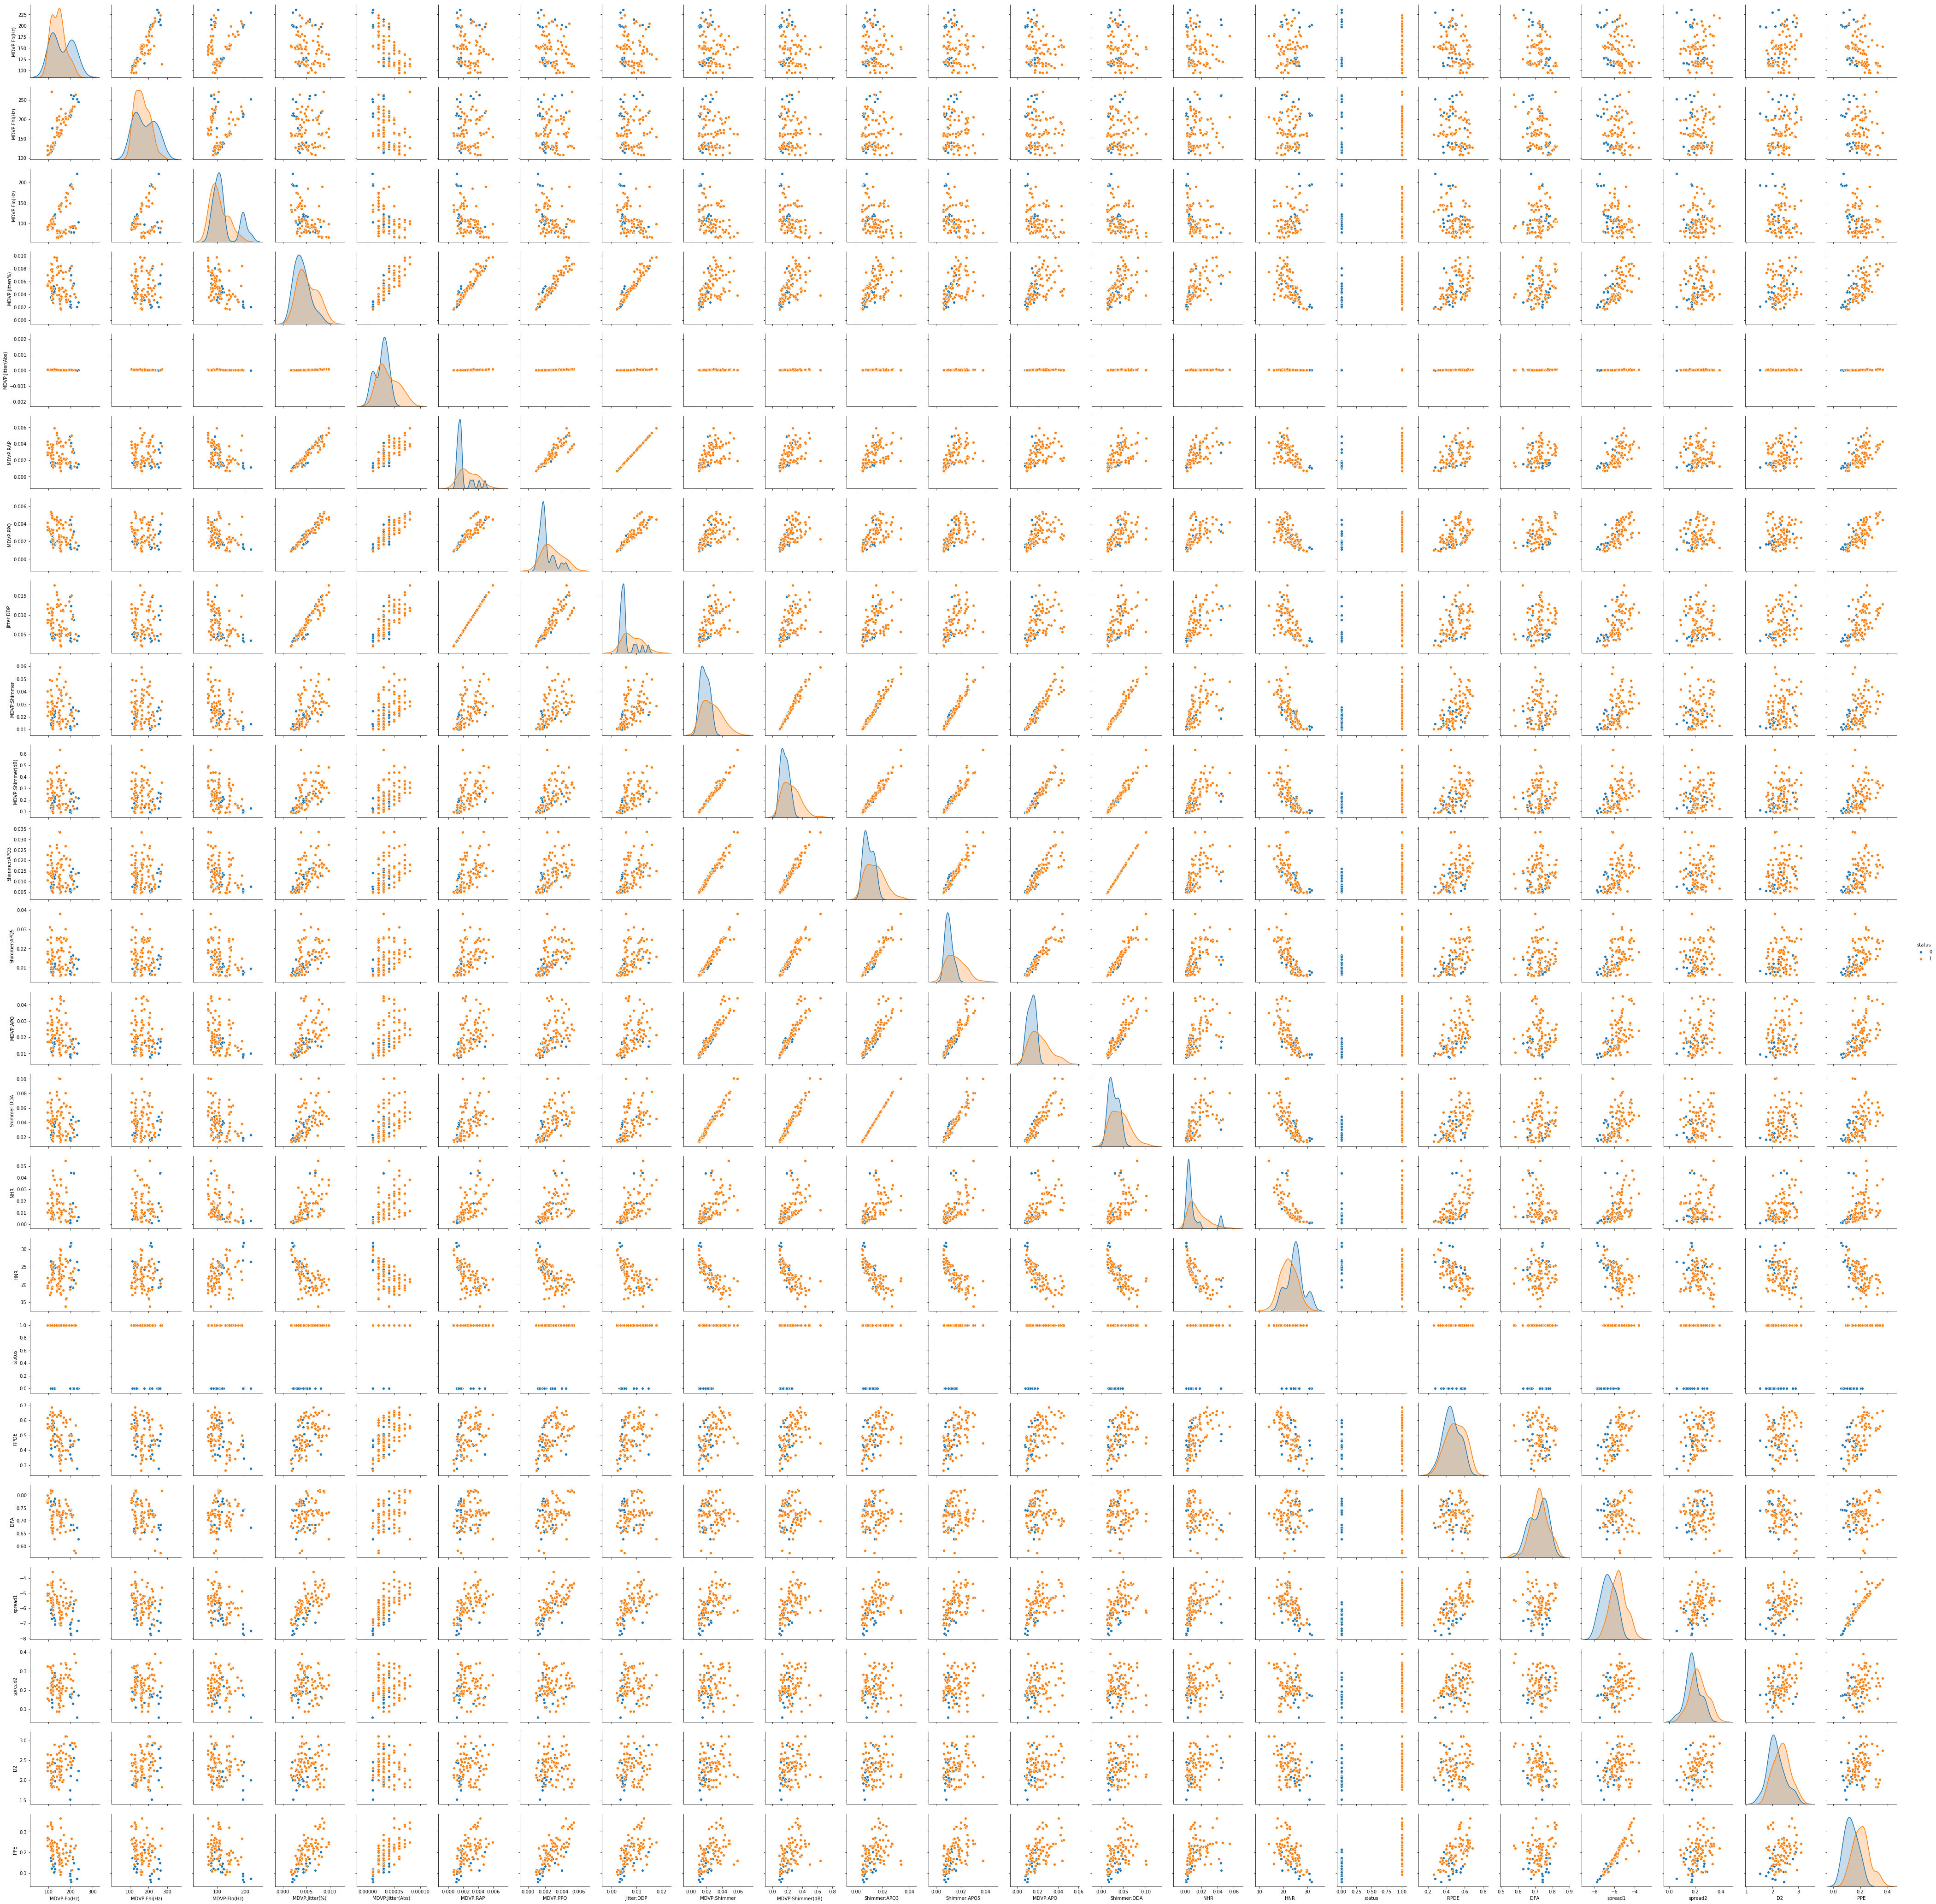

In [296]:
#Let us now construct a pairplot for analysing the data
#Seaborn visualization library
import seaborn as sns
sns.pairplot(capDf.iloc[:, (capDf.columns != 'name')].sample(100), hue = 'status')

In [349]:
#Based on the above, most of the data seems to be relatively homogenous. Therefore, we can continue with this dataset
#for further bivariate analysis
capDf.corr()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,1.000000,0.005190,-0.043632,-0.079469,-0.027067,-0.073830,0.048558,-0.058804,0.048641,-0.033276,...,-0.016570,0.201425,-0.219457,-0.173711,0.042442,-0.330818,0.028194,-0.192609,0.091061,-0.072967
MDVP:Fo(Hz),0.005190,1.000000,0.824075,0.476202,-0.289593,-0.631856,-0.182958,-0.319504,-0.182981,-0.217825,...,-0.190889,-0.114354,0.165689,-0.279316,-0.403179,-0.449061,-0.495005,-0.263238,0.205486,-0.492943
MDVP:Fhi(Hz),-0.043632,0.824075,1.000000,0.241802,-0.119108,-0.425756,-0.071615,-0.127436,-0.071662,-0.122590,...,-0.114254,0.024962,0.022764,-0.188068,-0.218244,-0.457236,-0.295718,-0.163592,0.219061,-0.282576
MDVP:Flo(Hz),-0.079469,0.476202,0.241802,1.000000,-0.482919,-0.523614,-0.422032,-0.430969,-0.421957,-0.378234,...,-0.359161,-0.451940,0.441198,-0.286647,-0.439575,0.037121,-0.511578,-0.194039,-0.160570,-0.480220
MDVP:Jitter(%),-0.027067,-0.289593,-0.119108,-0.482919,1.000000,0.881616,0.958400,0.949420,0.958394,0.564557,...,0.559090,0.630081,-0.635051,0.316907,0.435878,0.222863,0.669904,0.206417,0.200145,0.680598
MDVP:Jitter(Abs),-0.073830,-0.631856,-0.425756,-0.523614,0.881616,1.000000,0.803404,0.878563,0.803397,0.513739,...,0.498256,0.498401,-0.523716,0.343450,0.514593,0.367870,0.733558,0.294354,0.048503,0.755769
MDVP:RAP,0.048558,-0.182958,-0.071615,-0.422032,0.958400,0.803404,1.000000,0.906066,0.999998,0.543007,...,0.547796,0.650379,-0.623910,0.321914,0.373406,0.163155,0.580014,0.083889,0.228113,0.574385
MDVP:PPQ,-0.058804,-0.319504,-0.127436,-0.430969,0.949420,0.878563,0.906066,1.000000,0.906065,0.579770,...,0.564747,0.544038,-0.640907,0.330993,0.415562,0.332050,0.712760,0.211143,0.144758,0.760272
Jitter:DDP,0.048641,-0.182981,-0.071662,-0.421957,0.958394,0.803397,0.999998,0.906065,1.000000,0.542943,...,0.547740,0.650310,-0.623972,0.321942,0.373312,0.163098,0.580178,0.083748,0.228149,0.574560
MDVP:Shimmer,-0.033276,-0.217825,-0.122590,-0.378234,0.564557,0.513739,0.543007,0.579770,0.542943,1.000000,...,0.984449,0.633987,-0.755374,0.340641,0.475002,0.075349,0.529867,0.269553,0.299872,0.533712


In [350]:
#Since we require to correlate with mainly the status column (our target variable), we shall choose the same.
capDf.corr()['status']

name               -0.173711
MDVP:Fo(Hz)        -0.279316
MDVP:Fhi(Hz)       -0.188068
MDVP:Flo(Hz)       -0.286647
MDVP:Jitter(%)      0.316907
MDVP:Jitter(Abs)    0.343450
MDVP:RAP            0.321914
MDVP:PPQ            0.330993
Jitter:DDP          0.321942
MDVP:Shimmer        0.340641
MDVP:Shimmer(dB)    0.335540
Shimmer:APQ3        0.311157
Shimmer:APQ5        0.328890
MDVP:APQ            0.375196
Shimmer:DDA         0.311133
NHR                 0.257518
HNR                -0.372397
status              1.000000
RPDE                0.234122
DFA                 0.095712
spread1             0.512426
spread2             0.315381
D2                  0.300401
PPE                 0.489184
Name: status, dtype: float64

In [351]:
#Here we see a relatively higher correlation with status for spread1 and PPE (measures of fundamental
#frequency variation)
#Among firm tests, MDVP:APQ and MDVP:Shimmer (a measure of variation in amplitude), also seem to have an effect on
#the outcome of the status variable

In [352]:
#Let us now drop variables from feature set having correlation in range -0.1 to 0.1 with target variable, if any.
X = capDf.iloc[:, capDf.columns != 'status']
Y = capDf[['status']]
corr_list = pd.Series(capDf.drop('status', axis=1).apply(lambda x: x.corr(capDf['status'])))
print("Correlation between Independent Variables and Target Variable (status): ")
print(corr_list)
for index, column in enumerate(X):
    if((corr_list[index] > -0.1) & (corr_list[index] < 0.1)):
        print("Variable Dropped: ", column)
        X.drop(columns=column, axis = 1, inplace=True)

Correlation between Independent Variables and Target Variable (status): 
name               -0.173711
MDVP:Fo(Hz)        -0.279316
MDVP:Fhi(Hz)       -0.188068
MDVP:Flo(Hz)       -0.286647
MDVP:Jitter(%)      0.316907
MDVP:Jitter(Abs)    0.343450
MDVP:RAP            0.321914
MDVP:PPQ            0.330993
Jitter:DDP          0.321942
MDVP:Shimmer        0.340641
MDVP:Shimmer(dB)    0.335540
Shimmer:APQ3        0.311157
Shimmer:APQ5        0.328890
MDVP:APQ            0.375196
Shimmer:DDA         0.311133
NHR                 0.257518
HNR                -0.372397
RPDE                0.234122
DFA                 0.095712
spread1             0.512426
spread2             0.315381
D2                  0.300401
PPE                 0.489184
dtype: float64
Variable Dropped:  DFA


In [353]:
#Since the variable 'DFA' is very weakly correlated with 'status', it has been dropped
X.corr()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,spread1,spread2,D2,PPE
name,1.000000,0.005190,-0.043632,-0.079469,-0.027067,-0.073830,0.048558,-0.058804,0.048641,-0.033276,...,-0.043103,-0.071985,-0.016570,0.201425,-0.219457,0.042442,0.028194,-0.192609,0.091061,-0.072967
MDVP:Fo(Hz),0.005190,1.000000,0.824075,0.476202,-0.289593,-0.631856,-0.182958,-0.319504,-0.182981,-0.217825,...,-0.185271,-0.258140,-0.190889,-0.114354,0.165689,-0.403179,-0.495005,-0.263238,0.205486,-0.492943
MDVP:Fhi(Hz),-0.043632,0.824075,1.000000,0.241802,-0.119108,-0.425756,-0.071615,-0.127436,-0.071662,-0.122590,...,-0.088085,-0.127297,-0.114254,0.024962,0.022764,-0.218244,-0.295718,-0.163592,0.219061,-0.282576
MDVP:Flo(Hz),-0.079469,0.476202,0.241802,1.000000,-0.482919,-0.523614,-0.422032,-0.430969,-0.421957,-0.378234,...,-0.332089,-0.402093,-0.359161,-0.451940,0.441198,-0.439575,-0.511578,-0.194039,-0.160570,-0.480220
MDVP:Jitter(%),-0.027067,-0.289593,-0.119108,-0.482919,1.000000,0.881616,0.958400,0.949420,0.958394,0.564557,...,0.516658,0.514250,0.559090,0.630081,-0.635051,0.435878,0.669904,0.206417,0.200145,0.680598
MDVP:Jitter(Abs),-0.073830,-0.631856,-0.425756,-0.523614,0.881616,1.000000,0.803404,0.878563,0.803397,0.513739,...,0.474627,0.480059,0.498256,0.498401,-0.523716,0.514593,0.733558,0.294354,0.048503,0.755769
MDVP:RAP,0.048558,-0.182958,-0.071615,-0.422032,0.958400,0.803404,1.000000,0.906066,0.999998,0.543007,...,0.496047,0.469522,0.547796,0.650379,-0.623910,0.373406,0.580014,0.083889,0.228113,0.574385
MDVP:PPQ,-0.058804,-0.319504,-0.127436,-0.430969,0.949420,0.878563,0.906066,1.000000,0.906065,0.579770,...,0.583779,0.530883,0.564747,0.544038,-0.640907,0.415562,0.712760,0.211143,0.144758,0.760272
Jitter:DDP,0.048641,-0.182981,-0.071662,-0.421957,0.958394,0.803397,0.999998,0.906065,1.000000,0.542943,...,0.496014,0.469485,0.547740,0.650310,-0.623972,0.373312,0.580178,0.083748,0.228149,0.574560
MDVP:Shimmer,-0.033276,-0.217825,-0.122590,-0.378234,0.564557,0.513739,0.543007,0.579770,0.542943,1.000000,...,0.974837,0.949455,0.984449,0.633987,-0.755374,0.475002,0.529867,0.269553,0.299872,0.533712


In [354]:
#Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
test_size = 0.30 # taking 70:30 training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

In [331]:
#As we are using a decision tree classifier, we are not strictly required to scale features

In [355]:
from sklearn.tree import DecisionTreeClassifier
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [356]:
dt_model.score(X_test , y_test)

0.9333333333333333

In [357]:
#We see that above model is good, as we have a score of 93.3%. Now let us verify with metrics

In [358]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc
from sklearn import metrics

In [360]:
from sklearn.metrics import classification_report
predictions = dt_model.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.67      0.80         9
          1       0.92      1.00      0.96        36

avg / total       0.94      0.93      0.93        45



In [361]:
pd.DataFrame(data=[accuracy_score(y_test, predictions), 
                   recall_score(y_test, predictions),
                   precision_score(y_test, predictions)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.933333
recall,1.000000
precision,0.923077


In [362]:
#We have achieved a very good accuracy, recall and precision, indicating that the model is well trained with
#appropriately processed data.

In [363]:
#Let us know visit the confusion matrix.
metrics.confusion_matrix(y_test, predictions)

array([[ 6,  3],
       [ 0, 36]])

In [364]:
#We observe that we have only 3 false positive and 0 false negatives, indicating a well trained model.

In [365]:
#Now let us use regularization to improve our model further. Regularization helps prevent overfitting in our
#decision tree. However, I believe overfitting has not been a cause of concern in our previously constructed model
#as the validation accuracy on the test set is good and we have measured only 3 negative predictions in the form of
#false negatives and false positives. Nevertheless, lets see if we can improve further, with model max depth as 5 
#(default is none) and min samples in a leaf as 2 (default being 1), later tuning/omitting both and 
#observing the statistics.
#Let's use a simple grid search to iterate over the tuning parameters. Criterion shall remain as entropy.

In [366]:
best_score = 0
for maxDepth in [3, 5, 7, 8, 10]:
    for minSampleLeaf in [2, 3, 4, 5, 7]:
        #Training Decision Tree on each combination of parameters
        dt_model_Regularized = DecisionTreeClassifier(criterion = 'entropy', max_depth = maxDepth, min_samples_leaf = minSampleLeaf, random_state=42)
        dt_model_Regularized.fit(X_train, y_train)
        score = dt_model_Regularized.score(X_test , y_test)
        #Storing the best score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'Max Depth': maxDepth, 'Min Samples in Leaf': minSampleLeaf}
            
print("Best Score: {:.3f}".format(best_score))
print("Best Parameters: {}".format(best_parameters))

Best Score: 0.933
Best Parameters: {'Max Depth': 3, 'Min Samples in Leaf': 3}


In [367]:
#We see that for max depth of tree as 3 and min samples in leaf as 3, we achieve the best score for our model.
#Let us verify with metrics and confusion matrix
dt_model_Regularized = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 3, random_state=42)
dt_model_Regularized.fit(X_train, y_train)
predictions_tuned = dt_model_Regularized.predict(X_test)

In [368]:
pd.DataFrame(data=[accuracy_score(y_test, predictions_tuned), 
                   recall_score(y_test, predictions_tuned),
                   precision_score(y_test, predictions_tuned)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.933333
recall,1.000000
precision,0.923077


In [369]:
#We notice that the best possible model obtained with regularization is only as strong as with the default settings
#of max depth and min samples in leaf nodes.
#Let us complete final verification with the confusion matrix
metrics.confusion_matrix(y_test, predictions_tuned)

array([[ 6,  3],
       [ 0, 36]])

In [377]:
#We observe that we have only 3 false positives and 0 false negative, indicating that we have the best possible model
#with default regularization settings.
#However, I believe limiting the max depth to 3 would make our model computationally and logically less complex. So lets
#now try a setting of min samples in leaf as 1 (default) and max depth 3
dt_model_Regularized = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=42)
dt_model_Regularized.fit(X_train, y_train)
predictions_tuned = dt_model_Regularized.predict(X_test)

pd.DataFrame(data=[accuracy_score(y_test, predictions_tuned), 
                   recall_score(y_test, predictions_tuned),
                   precision_score(y_test, predictions_tuned)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.933333
recall,1.000000
precision,0.923077


In [378]:
#Therefore, we recommend a max depth of at least 3 for our model (as lower tends to hamper results, higher may be okay
#, as it seems our decision tree for given data set has a max depth of 3 itself. Min Samples in Leaf have to be 1. This
#will ensure a computationally and logically less complex model)

In [385]:
#Random Forest Classifier (Ensemble Method) - Default Settings
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(random_state=42)
rfcl = rfcl.fit(X_train, y_train)
rfcl_prediction = rfcl.predict(X_test)

In [386]:
pd.DataFrame(data=[accuracy_score(y_test, rfcl_prediction), 
                   recall_score(y_test, rfcl_prediction),
                   precision_score(y_test, rfcl_prediction)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.866667
recall,0.944444
precision,0.894737


In [387]:
#Customized Number of Estimator Trees to be used in the random forest and identify the best setting
import warnings
warnings.filterwarnings('ignore')
best_score = 0
for number_of_trees in range(10, 500, 5):
    rfcl = RandomForestClassifier(n_estimators=number_of_trees, random_state=42)
    rfcl = rfcl.fit(X_train, y_train)
    rfcl_score = rfcl.score(X_test , y_test)
    #Storing the best score and parameters
    if rfcl_score > best_score:
        best_score = rfcl_score
        best_parameters = {'Number of Trees': number_of_trees}
            
print("Best Score: {:.3f}".format(best_score))
print("Best Parameters: {}".format(best_parameters))

Best Score: 0.933
Best Parameters: {'Number of Trees': 30}


In [389]:
#We observe that the best score of 0.933 or 93.3% occurs for number of trees in the random forest classifier as 30.
#Let us verify with metrics.
rfcl_tuned = RandomForestClassifier(n_estimators=30, random_state=42)
rfcl_tuned = rfcl_tuned.fit(X_train, y_train)
predictions_tuned_rfcl = rfcl_tuned.predict(X_test)
print(rfcl_tuned.score(X_test , y_test))
pd.DataFrame(data=[accuracy_score(y_test, predictions_tuned_rfcl), 
               recall_score(y_test, predictions_tuned_rfcl),
               precision_score(y_test, predictions_tuned_rfcl)], 
         index=["accuracy", "recall", "precision"])

0.9333333333333333


,0
accuracy,0.933333
recall,1.000000
precision,0.923077


In [390]:
#Lets finally verify with confusion matrix
metrics.confusion_matrix(y_test, predictions_tuned_rfcl)

array([[ 6,  3],
       [ 0, 36]])

In [325]:
#We see only 3 false positives and 0 false negatives which is considered an excellent model. Therefore, tunining
#parameters did help in the case of Random Forest.